# **Data Preparation for Tableau**


In [9]:
import pandas as pd

In [11]:
# read in the csv file as a pandas dataframe
bikes = pd.read_csv("london_merged.csv")

In [13]:
# get the data info
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [15]:
bikes.shape

(17414, 10)

In [17]:
bikes


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [19]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [23]:

# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the weather_code column data type to string
bikes.weather_code = bikes.weather_code.astype('str')
# mapping the values to the actual written weathers
bikes.weather_code = bikes.weather_code.map(weather_dict)

In [115]:
# count the unique values in the season column
bikes.season.value_counts()

season
spring    4394
summer    4387
winter    4330
autumn    4303
Name: count, dtype: int64

In [29]:
season_dict={
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# changing the season column data type to string
bikes.season=bikes.season.astype('str')
# mapping the values to the actual written weathers
bikes.season=bikes.season.map(season_dict)


In [31]:
# changing the humidity values to percentage (i.e. a value between 0 and 1)
bikes.hum = bikes.hum/ 100

In [33]:
# specifying the column names that I want to use
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)


In [35]:
# checking our dataframe to see if the mappings and new column names have worked
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [139]:
bikes.to_excel('london_bikes_final.xlsx', sheet_name='bikes_data')

 # **Exploratory Data Analysis & Visualization**

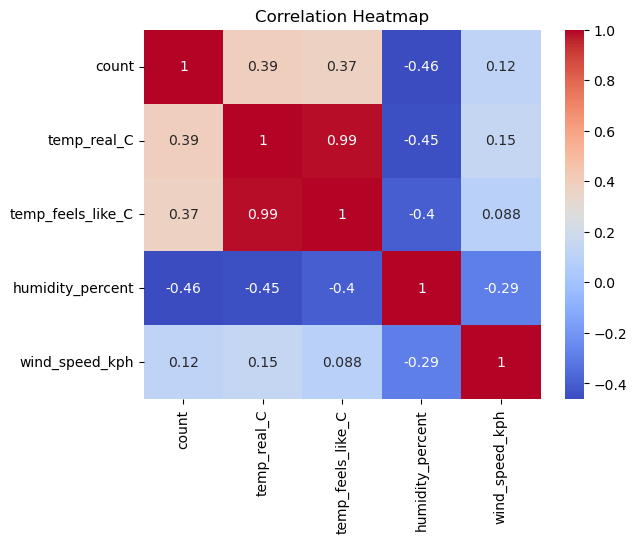

In [43]:
# Correlation Heatmap of Weather Conditions

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = bikes[['count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


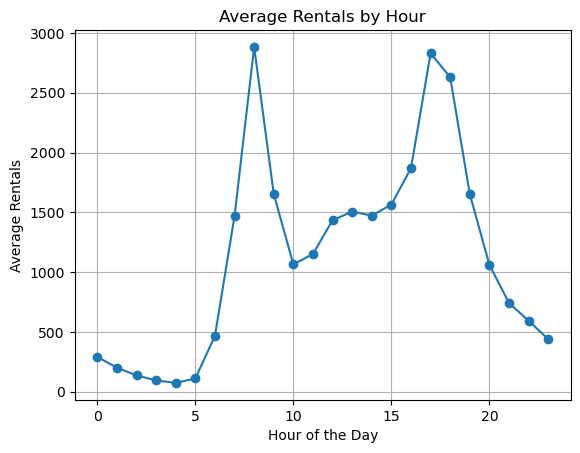

In [61]:
# Average Rentals by Hour

bikes['hour'] = pd.to_datetime(bikes['time']).dt.hour
busiest_hour = bikes.groupby('hour')['count'].mean()

busiest_hour.plot(kind='line', marker='o')
plt.title('Average Rentals by Hour')
plt.grid()
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.show()


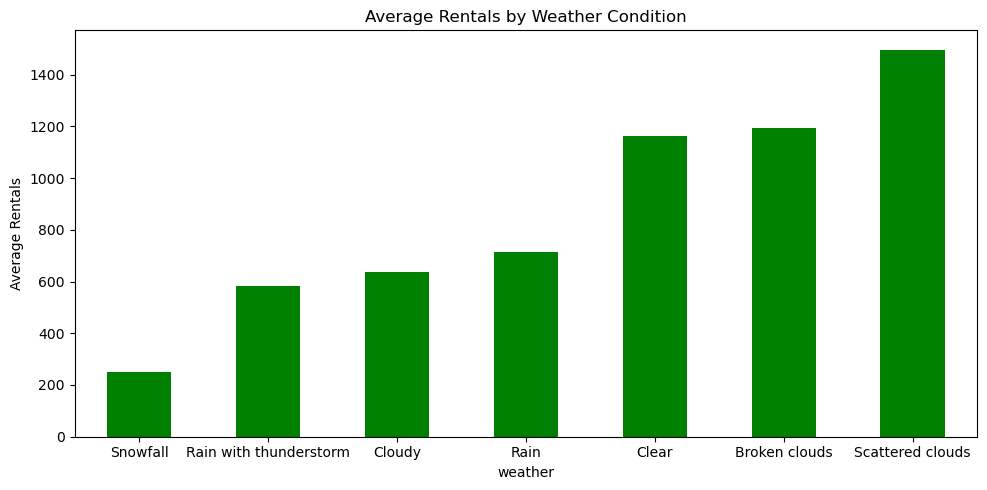

In [105]:
#Average Rentals by Weather condition

weather_avg = bikes.groupby('weather')['count'].mean().sort_values()

plt.figure(figsize=(10, 5))
weather_avg.plot(kind='bar', color='green')
plt.title('Average Rentals by Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


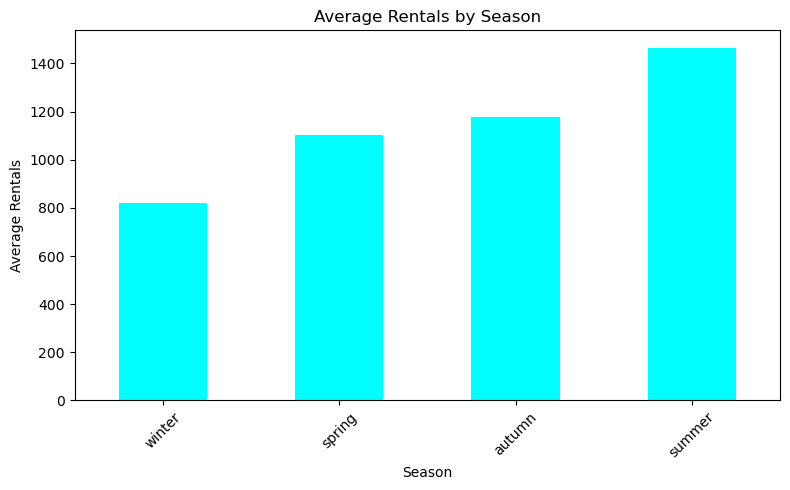

In [109]:
# Average rentals by season

season_avg = bikes.groupby('season')['count'].mean().sort_values()

plt.figure(figsize=(8, 5))
season_avg.plot(kind='bar', color='cyan')
plt.title('Average Rentals by Season')
plt.ylabel('Average Rentals')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.show()


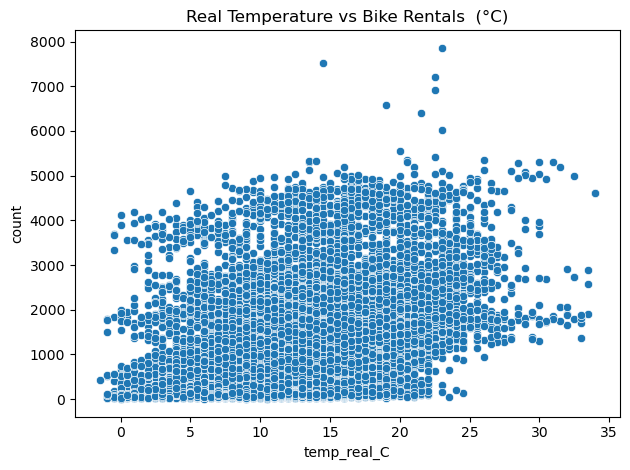

In [137]:
#impact of temperature on bike rentals

sns.scatterplot(x='temp_real_C', y='count', data=bikes)
plt.title('Real Temperature vs Bike Rentals  (°C)')
plt.tight_layout()
plt.show()


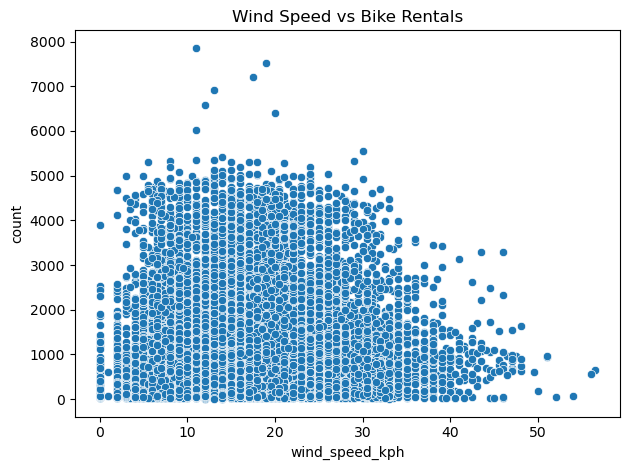

In [135]:
# Windspeed impact on bike rentals

sns.scatterplot(x='wind_speed_kph', y='count', data=bikes)
plt.title('Wind Speed vs Bike Rentals')
plt.tight_layout()
plt.show()

